In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
import xarray as xr
import numpy as np
df = gpd.read_file('/data/acker/ALA/NA/final/NAv5_GWRPM25_mean_2016-2018_exact_GL_filtered.shp')

In [2]:
df.dropna(axis=1,inplace=True)

In [3]:
df

,lat,lon,GWRPM25,geometry
0,14.125,-91.625,28.400000,POINT (-91.625 14.125)
1,14.125,-91.375,32.466667,POINT (-91.375 14.125)
2,14.125,-91.125,29.199999,POINT (-91.125 14.125)
3,14.125,-90.875,37.966663,POINT (-90.875 14.125)
4,14.125,-90.625,43.433334,POINT (-90.625 14.125)
...,...,...,...,...
38885,67.875,-83.125,1.100000,POINT (-83.125 67.875)
38886,67.875,-82.875,1.000000,POINT (-82.875 67.875)
38887,67.875,-82.625,0.600000,POINT (-82.625 67.875)
38888,67.875,-82.375,1.500000,POINT (-82.375 67.875)


In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [5]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [6]:
counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [7]:
counties_conus = counties_conus.to_crs(df.crs)

In [8]:
import geopandas as gpd
import pandas as pd

# Parameters
chunk_size = 10000  # Adjust this based on your memory capacity

# Initialize an empty list to store results
results = []

# Iterate over chunks of the data
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk_result = gpd.sjoin(chunk, counties_conus[['GEOID', 'geometry']], how="left", predicate="within")
    chunk_result.dropna(subset=['GEOID'], inplace=True)  # Drop rows where GEOID is NaN in this chunk
    results.append(chunk_result)

# Concatenate all chunk results
df_counties = pd.concat(results, ignore_index=True)


In [9]:
df_counties

,lat,lon,GWRPM25,geometry,index_right,GEOID
0,19.125,-155.875,9.366667,POINT (-155.875 19.125),269.0,15001
1,19.125,-155.625,4.600000,POINT (-155.625 19.125),269.0,15001
2,19.375,-155.875,9.099999,POINT (-155.875 19.375),269.0,15001
3,19.375,-155.625,2.166667,POINT (-155.625 19.375),269.0,15001
4,19.375,-155.375,5.600000,POINT (-155.375 19.375),269.0,15001
...,...,...,...,...,...,...
16324,67.875,-142.125,2.566667,POINT (-142.125 67.875),2780.0,02290
16325,67.875,-141.875,2.400000,POINT (-141.875 67.875),2780.0,02290
16326,67.875,-141.625,2.366667,POINT (-141.625 67.875),2780.0,02290
16327,67.875,-141.375,3.000000,POINT (-141.375 67.875),2780.0,02290


In [10]:
# Group by GEOID and calculate the 90th percentile of GWRPM25 for each county
#county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].quantile(0.9).reset_index()
county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].max().reset_index()
##county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].maean().reset_index()

# Rename the column for clarity
county_90th_percentile = county_90th_percentile.rename(columns={'GWRPM25': 'PM25_90th'})

# Display the result
print(county_90th_percentile)


      GEOID  PM25_90th
0     01001   7.533333
1     01003   8.366666
2     01005   7.700000
3     01007   7.800000
4     01009   8.000000
...     ...        ...
3022  56037   6.600000
3023  56039   5.533333
3024  56041   6.666667
3025  56043   6.333333
3026  56045   8.566667

[3027 rows x 2 columns]


In [11]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
county_90th_percentile_with_geometry = county_90th_percentile.merge(counties[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')

# Display the result
print(county_90th_percentile_with_geometry)


      GEOID  PM25_90th                                           geometry  \
0     01001   7.533333  POLYGON ((-86.9212 32.65754, -86.92035 32.6585...   
1     01003   8.366666  POLYGON ((-88.02858 30.22676, -88.02399 30.230...   
2     01005   7.700000  POLYGON ((-85.74803 31.61918, -85.74544 31.618...   
3     01007   7.800000  POLYGON ((-87.42194 33.00338, -87.33177 33.005...   
4     01009   8.000000  POLYGON ((-86.96336 33.85822, -86.95967 33.857...   
...     ...        ...                                                ...   
3022  56037   6.600000  POLYGON ((-110.05438 42.01103, -110.05436 42.0...   
3023  56039   5.533333  POLYGON ((-111.05361 44.66627, -110.75076 44.6...   
3024  56041   6.666667  POLYGON ((-111.04663 41.14012, -111.04662 41.1...   
3025  56043   6.333333  POLYGON ((-108.55063 44.15179, -108.55056 44.1...   
3026  56045   8.566667  POLYGON ((-105.08123 43.65128, -105.0808 43.71...   

     STUSPS  
0        AL  
1        AL  
2        AL  
3        AL  
4    

In [12]:
# Extract the North Slope row from `counties_conus`
north_slope = counties_conus[counties_conus['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['PM25_90th'] = None

'''# Append this row to the `county_90th_percentile_with_geometry` DataFrame
county_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)

# Ensure it's a GeoDataFrame with the correct geometry
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')'''

"# Append this row to the `county_90th_percentile_with_geometry` DataFrame\ncounty_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)\n\n# Ensure it's a GeoDataFrame with the correct geometry\ncounty_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')"

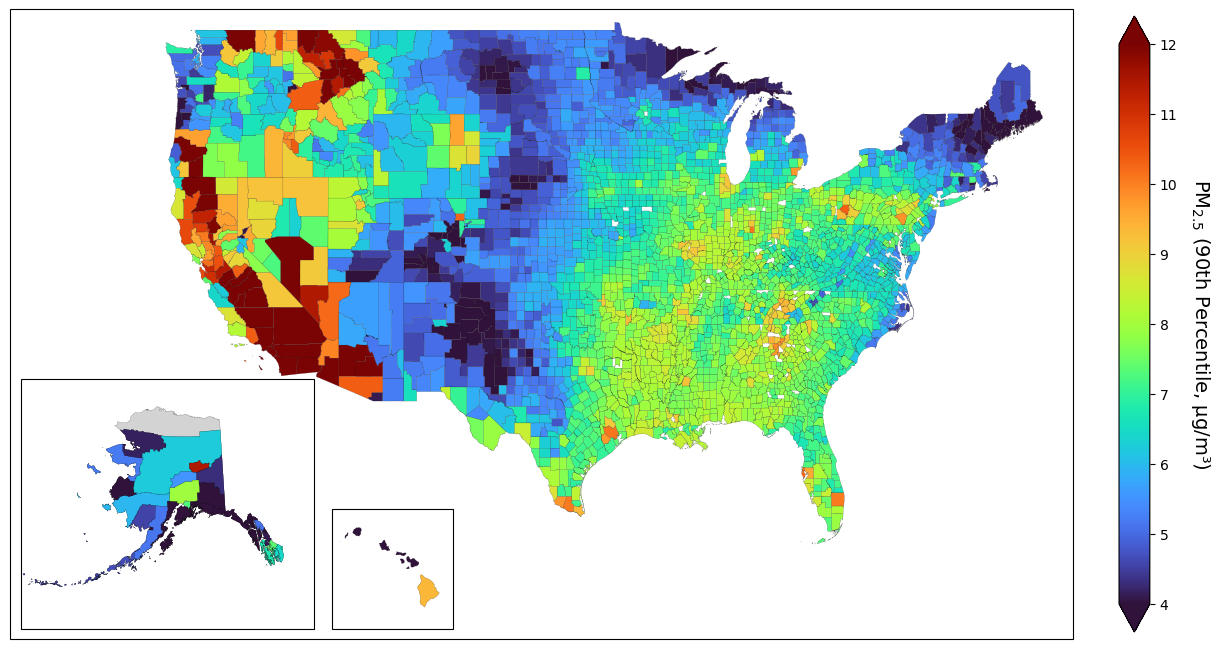

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

# Define the data column and color map
data_column = 'PM25_90th'
cmap = 'turbo'
norm = mpl.colors.Normalize(vmin=4, vmax=12)  # Adjust vmin and vmax based on your data range

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.19, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot Alaska counties
alaska_counties.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black',
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.19, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_conus, missing_kwds=missing_kwds
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_hawaii, missing_kwds=missing_kwds
)

# Plot North Slope separately in gray

# Add a colorbar to the main map
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to an empty array to use custom normalization
cbar = fig.colorbar(sm, ax=ax_conus, orientation='vertical', fraction=0.046, pad=0.04, shrink=0.8, extend='both')
cbar.set_label('PM$_{2.5}$ (90th Percentile, µg/m³)', fontsize=14, rotation=270, labelpad=25)

# Add a title to the plot
plt.show()


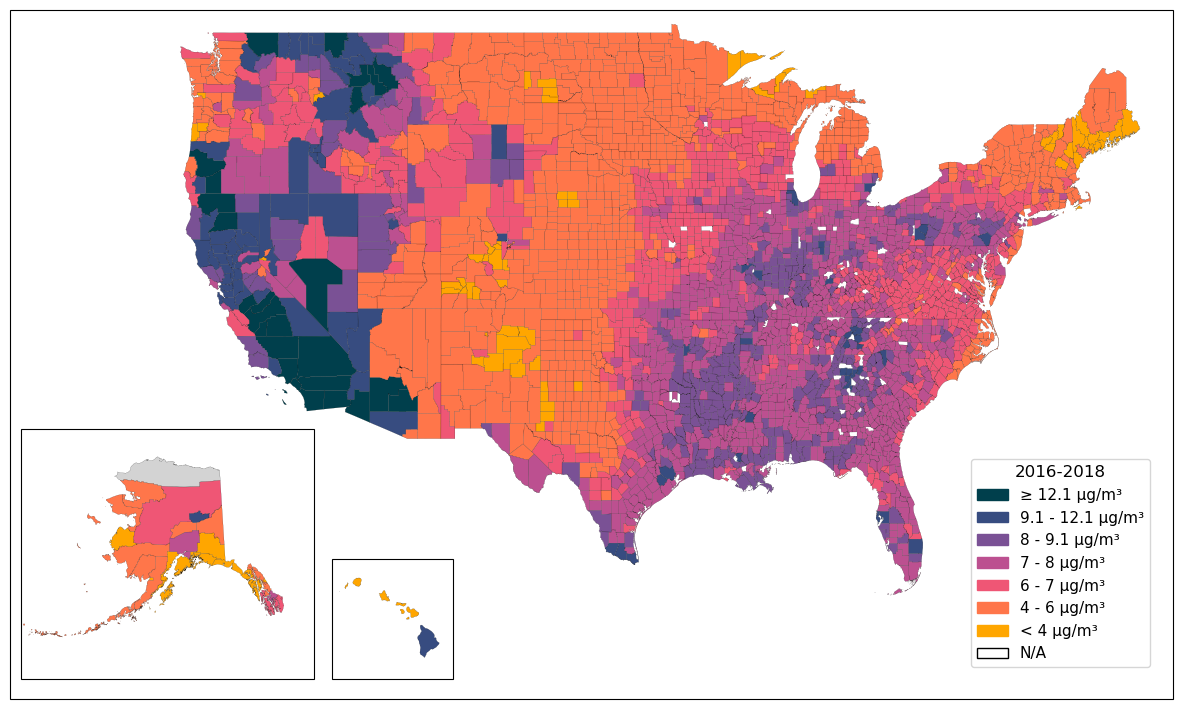

In [14]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = county_90th_percentile_with_geometry.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9.1 µg/m³", "9.1 - 12.1 µg/m³", "≥ 12.1 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2016-2018",
    fontsize=11,
    title_fontsize=12
)

# Add a title to the plot
plt.show()


In [13]:
# Define a function to assign range categories
def assign_range(value):
    if pd.isna(value):
        return 'N/A'
    elif value < 4:
        return "< 4 µg/m³"
    elif 4 <= value < 6:
        return "4 - 6 µg/m³"
    elif 6 <= value < 7:
        return "6 - 7 µg/m³"
    elif 7 <= value < 8:
        return "7 - 8 µg/m³"
    elif 8 <= value < 9.1:
        return "8 - 9.1 µg/m³"
    elif 9.1 <= value < 12.1:
        return "9.1 - 12.1 µg/m³"
    else:  # > 12
        return ">= 12.1 µg/m³"

# Assign range categories
county_90th_percentile_with_geometry['range'] = county_90th_percentile_with_geometry['PM25_90th'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    county_90th_percentile_with_geometry.groupby('range')
    .agg(count=('GEOID', 'count'), states=('STUSPS', lambda x: ', '.join(sorted(x.unique()))))
    .reset_index()
)

# Display the summary
print(summary)


              range  count                                             states
0       4 - 6 µg/m³    495  AK, AZ, CO, HI, ID, KS, MA, ME, MI, MN, MT, NC...
1       6 - 7 µg/m³    932  AL, AR, AZ, CO, CT, DE, FL, GA, IA, ID, KS, KY...
2       7 - 8 µg/m³   1066  AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID...
3     8 - 9.1 µg/m³    520  AK, AL, AR, AZ, CA, CO, FL, GA, IA, ID, IL, IN...
4  9.1 - 12.1 µg/m³     92  AK, AR, AZ, CA, FL, GA, ID, IL, IN, KY, LA, MD...
5         < 4 µg/m³     16                                             AK, HI
6     >= 12.1 µg/m³     21                                             AK, CA


In [14]:
# Assign range categories
county_90th_percentile_with_geometry['range'] = county_90th_percentile_with_geometry['PM25_90th'].apply(assign_range)

# Group by 'range' and 'STUSPS' (state) to count counties per state in each range
state_counts = (
    county_90th_percentile_with_geometry.groupby(['range', 'STUSPS'])
    .size()
    .reset_index(name='count')
)

# Find the top 5 states for each range
top_states_by_range = state_counts.groupby('range').apply(
    lambda group: group.nlargest(5, 'count')
).reset_index(drop=True)


top_states_by_range

/tmp/ipykernel_42560/4047024555.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_states_by_range = state_counts.groupby('range').apply(


,range,STUSPS,count
0,4 - 6 µg/m³,TX,63
1,4 - 6 µg/m³,CO,46
2,4 - 6 µg/m³,ND,44
3,4 - 6 µg/m³,MN,38
4,4 - 6 µg/m³,NE,32
5,6 - 7 µg/m³,VA,95
6,6 - 7 µg/m³,TX,82
7,6 - 7 µg/m³,NC,55
8,6 - 7 µg/m³,NE,51
9,6 - 7 µg/m³,KS,43


In [31]:
less_than_3 = county_90th_percentile_with_geometry[county_90th_percentile_with_geometry['PM25_90th'] < 3]
print(less_than_3[['GEOID', 'STUSPS', 'PM25_90th']])


     GEOID STUSPS  PM25_90th
549  15007     HI        2.8


In [ ]:
#count how many counties above 12 ug/m^3 and above 9 ug/m^3 for monitored and unmonitored counties

In [14]:
# epa CDVs for pearson
gdf_epa = gpd.read_file('/data/acker/for_lizzy/EPA_COUNTY_V2/EPA_countyDV_2022_v2.shp')

In [15]:
import numpy as np

# Set values that are 0 in F2020_2022 to NaN in gdf_epa
gdf_epa.loc[gdf_epa['F2020_2022'] == 0, 'F2020_2022'] = np.nan

# Drop rows where F2020_2022 is NaN, so only counties with valid EPA data remain
gdf_epa.dropna(subset=['F2020_2022'], inplace=True)

# Step 1: Identify GEOIDs with valid F2020_2022 values in gdf_epa
epa_geoids = gdf_epa['GEOID'].unique()

# Step 3: Identify unmonitored counties
unmonitored_counties = county_90th_percentile_with_geometry[
    ~county_90th_percentile_with_geometry['GEOID'].isin(epa_geoids)
]

# Step 2: Update PM25_90th in county_90th_percentile_with_geometry to NaN for GEOIDs not in epa_geoids
county_90th_percentile_with_geometry.loc[
    ~county_90th_percentile_with_geometry['GEOID'].isin(epa_geoids), 'PM25_90th'
] = np.nan


In [16]:
unmonitored_counties

,GEOID,PM25_90th,geometry,STUSPS,color,range
0,01001,7.533333,"POLYGON ((-86.92119 32.65754, -86.92035 32.658...",AL,#bc5090,7 - 8 µg/m³
2,01005,7.266666,"POLYGON ((-85.74803 31.61918, -85.74543 31.618...",AL,#bc5090,7 - 8 µg/m³
3,01007,7.466667,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",AL,#bc5090,7 - 8 µg/m³
4,01009,7.166667,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",AL,#bc5090,7 - 8 µg/m³
5,01011,7.066667,"POLYGON ((-85.99926 32.25018, -85.98655 32.250...",AL,#bc5090,7 - 8 µg/m³
...,...,...,...,...,...,...
3135,56033,6.200000,"POLYGON ((-107.91152 45.00068, -107.90818 45.0...",WY,#ef5675,6 - 7 µg/m³
3137,56037,6.133333,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",WY,#ef5675,6 - 7 µg/m³
3139,56041,6.700000,"POLYGON ((-111.04663 41.14013, -111.04662 41.1...",WY,#ef5675,6 - 7 µg/m³
3140,56043,5.366667,"POLYGON ((-108.55063 44.1518, -108.55056 44.16...",WY,#ff764a,4 - 6 µg/m³


In [17]:
#count how many counties above 12 ug/m^3 and above 9 ug/m^3 for monitored and unmonitored counties
pm25_count_9 = unmonitored_counties[unmonitored_counties['PM25_90th'] >= 9.1].shape[0]
pm25_count_12 = unmonitored_counties[unmonitored_counties['PM25_90th'] >= 12.1].shape[0]
print(pm25_count_9, pm25_count_12)

36 5


In [18]:
county_90th_percentile_with_geometry.dropna(inplace=True)

In [19]:
#count how many counties above 12 ug/m^3 and above 9 ug/m^3 for monitored and unmonitored counties
pm25_count_9 = county_90th_percentile_with_geometry[county_90th_percentile_with_geometry['PM25_90th'] >= 9.1].shape[0]
pm25_count_12 = county_90th_percentile_with_geometry[county_90th_percentile_with_geometry['PM25_90th'] >= 12.1].shape[0]
print(pm25_count_9, pm25_count_12)

77 16


In [21]:


# Assign range categories
county_90th_percentile_with_geometry['range'] = county_90th_percentile_with_geometry['PM25_90th'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    county_90th_percentile_with_geometry.groupby('range')
    .agg(count=('GEOID', 'count'), states=('STUSPS', lambda x: ', '.join(sorted(x.unique()))))
    .reset_index()
)

# Display the summary
print(summary)


              range  count                                             states
0       4 - 6 µg/m³     50  AK, AZ, CO, HI, ME, MN, MT, ND, NM, NY, SD, TX...
1       6 - 7 µg/m³     85  CO, CT, IA, ID, KY, MA, MD, MI, MN, MT, NC, NE...
2       7 - 8 µg/m³    160  AL, AR, AZ, CA, CO, CT, DC, FL, GA, IA, ID, IN...
3     8 - 9.1 µg/m³    148  AL, AR, AZ, CA, CO, FL, GA, IA, IL, IN, KS, KY...
4  9.1 - 12.1 µg/m³     61  AZ, CA, FL, GA, ID, IL, IN, KY, LA, MI, MO, MS...
5         < 4 µg/m³      3                                             AK, HI
6      > 12.1 µg/m³     16                                             AK, CA


In [22]:


# Assign range categories
unmonitored_counties['range'] = unmonitored_counties['PM25_90th'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    unmonitored_counties.groupby('range')
    .agg(count=('GEOID', 'count'), states=('STUSPS', lambda x: ', '.join(sorted(x.unique()))))
    .reset_index()
)

# Display the summary
print(summary)


              range  count                                             states
0       4 - 6 µg/m³    445  AK, AZ, CO, ID, KS, MA, ME, MI, MN, MT, NC, ND...
1       6 - 7 µg/m³    847  AL, AR, AZ, CO, CT, DE, FL, GA, IA, ID, KS, KY...
2       7 - 8 µg/m³    906  AL, AR, AZ, CO, DE, FL, GA, IA, ID, IL, IN, KS...
3     8 - 9.1 µg/m³    372  AK, AL, AR, CA, CO, FL, GA, IA, ID, IL, IN, KS...
4  9.1 - 12.1 µg/m³     31         AK, AR, CA, ID, IN, LA, MD, MO, NV, OR, TX
5         < 4 µg/m³     13                                             AK, HI
6      > 12.1 µg/m³      5                                                 CA


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:


# Assign range categories
gdf_epa['range'] = gdf_epa['F2020_2022'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    gdf_epa.groupby('range')
    .agg(count=('GEOID', 'count'), states=('STUSPS', lambda x: ', '.join(sorted(x.unique()))))
    .reset_index()
)

# Display the summary
print(summary)


              range  count                                             states
0       4 - 6 µg/m³     56  AK, AZ, CO, CT, HI, MD, ME, MI, MN, MT, NC, ND...
1       6 - 7 µg/m³     75  AL, AZ, CA, CO, CT, FL, GA, IA, ID, KY, MA, MD...
2       7 - 8 µg/m³    134  AL, AR, CA, CO, CT, FL, IA, IL, IN, KY, LA, MA...
3     8 - 9.1 µg/m³    127  AL, AR, AZ, CA, CO, CT, DC, FL, GA, IA, ID, IL...
4  9.1 - 12.1 µg/m³     98  AL, AZ, CA, CO, FL, GA, ID, IL, IN, KS, KY, LA...
5         < 4 µg/m³     12                     HI, ME, MN, MT, NH, NY, SD, WY
6      > 12.1 µg/m³     21                             AK, AZ, CA, MT, OR, WA


In [16]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked_epa = gdf_epa.sort_values(by='F2020_2022', ascending=False).reset_index(drop=True)
county_ranked_epa.reset_index(inplace=True)
county_ranked_epa['F2020_2022']

0      19.5
1      18.8
2      18.4
3      17.5
4      17.0
       ... 
518     3.3
519     3.2
520     2.3
521     2.2
522     2.0
Name: F2020_2022, Length: 523, dtype: float64

In [17]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked = county_90th_percentile_with_geometry.sort_values(by='PM25_90th', ascending=False).reset_index(drop=True)
county_ranked.reset_index(inplace=True)
county_ranked

,index,GEOID,PM25_90th,geometry,STUSPS
0,0,06063,18.100000,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",CA
1,1,06045,17.133333,"POLYGON ((-124.02325 40.00128, -123.93545 40.0...",CA
2,2,06039,15.980000,"POLYGON ((-120.54554 37.02758, -120.54398 37.0...",CA
3,3,06029,14.733333,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",CA
4,4,06107,14.700000,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",CA
...,...,...,...,...,...
518,518,23009,4.300000,"MULTIPOLYGON (((-68.03522 44.33274, -68.03375 ...",ME
519,519,15001,4.166667,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",HI
520,520,15009,3.900000,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",HI
521,521,02110,3.633333,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",AK


In [18]:
import numpy as np
from scipy.stats import rankdata

# Merge the two DataFrames on 'GEOID' to get matched pairs for CDV and CDVE
# CDV (CDV) = F2020_2022 from county_ranked_epa
# CDVE (calculated satellite value) = PM25_90th from county_ranked
merged_df = county_ranked.merge(county_ranked_epa[['GEOID', 'F2020_2022']], on='GEOID', how='inner')

# Drop rows with NaN values in either column, only keep counties with both values
merged_df.dropna(subset=['PM25_90th', 'F2020_2022'], inplace=True)

# Extract CDV and CDVE values for correlation calculations
cdv = merged_df['F2020_2022'].values  # EPA design values (CDV)
cdve = merged_df['PM25_90th'].values  # 90th percentile PM2.5 values (CDVE)

# Calculate Pearson correlation coefficient
cdv_mean = np.mean(cdv)
cdve_mean = np.mean(cdve)
numerator = np.sum((cdv - cdv_mean) * (cdve - cdve_mean))
denominator = np.sqrt(np.sum((cdv - cdv_mean)**2) * np.sum((cdve - cdve_mean)**2))
pearson_correlation = numerator / denominator

# Calculate Spearman rank correlation coefficient
cdv_ranks = rankdata(cdv, method='min')
cdve_ranks = rankdata(cdve, method='min')
d_i = cdv_ranks - cdve_ranks
n = len(cdv)
spearman_numerator = 6 * np.sum(d_i**2)
spearman_denominator = n * (n**2 - 1)
spearman_correlation = 1 - (spearman_numerator / spearman_denominator)

# Print the results
print("Pearson Correlation Coefficient (r):", pearson_correlation)
print("Spearman Rank Correlation Coefficient (r_s):", spearman_correlation)


Pearson Correlation Coefficient (r): 0.7479285821713194
Spearman Rank Correlation Coefficient (r_s): 0.7100952902469554


In [25]:
gdf_epa

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,State_FIPS,County_FIP,EPA_Region,AQS_Site_I,F2020_2022,CBSA_Name,GEOID_1,GEOID_copy,ObjectID_1,geometry
0,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,...,13,121,4.0,131210056.0,9.4,"Atlanta-Sandy Springs-Roswell, GA",13121,13121,106,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
1,13,139,01686953,0500000US13139,13139,Hall,Hall County,GA,Georgia,06,...,13,139,4.0,131390003.0,8.8,"Gainesville, GA",13139,13139,109,"POLYGON ((-84.06225 34.16845, -84.05949 34.175..."
2,13,245,00358024,0500000US13245,13245,Richmond,Richmond County,GA,Georgia,06,...,13,245,4.0,132450091.0,10.4,"Augusta-Richmond County, GA-SC",13245,13245,113,"POLYGON ((-82.3503 33.3148, -82.33028 33.32901..."
3,34,023,00882230,0500000US34023,34023,Middlesex,Middlesex County,NJ,New Jersey,06,...,34,23,2.0,340230011.0,7.7,"New York-Newark-Jersey City, NY-NJ-PA",34023,34023,304,"POLYGON ((-74.63023 40.34313, -74.62828 40.346..."
4,34,021,00882229,0500000US34021,34021,Mercer,Mercer County,NJ,New Jersey,06,...,34,21,2.0,340210005.0,7.9,"Trenton, NJ",34021,34021,303,"POLYGON ((-74.94295 40.34164, -74.93228 40.339..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,48,043,01383807,0500000US48043,48043,Brewster,Brewster County,TX,Texas,06,...,48,43,6.0,480430101.0,5.5,None,48043,48043,435,"POLYGON ((-103.80068 30.41253, -103.72322 30.4..."
2855,31,177,00835910,0500000US31177,31177,Washington,Washington County,NE,Nebraska,06,...,31,177,7.0,311770002.0,6.2,"Omaha-Council Bluffs, NE-IA",31177,31177,290,"POLYGON ((-96.44478 41.68363, -96.40573 41.683..."
2856,21,019,00516856,0500000US21019,21019,Boyd,Boyd County,KY,Kentucky,06,...,21,19,4.0,210190017.0,8.0,"Huntington-Ashland, WV-KY-OH",21019,21019,178,"POLYGON ((-82.8177 38.37668, -82.81616 38.3772..."
2857,40,109,01101842,0500000US40109,40109,Oklahoma,Oklahoma County,OK,Oklahoma,06,...,40,109,6.0,401090097.0,10.1,"Oklahoma City, OK",40109,40109,367,"POLYGON ((-97.67405 35.56932, -97.67405 35.570..."


In [40]:
import pandas as pd

# Load your data into a DataFrame
# Assuming the DataFrame is already loaded and named `df`
gdf_epa.sort_values(by='GEOID', ascending=True, inplace=True)
county_90th_percentile_with_geometry.sort_values(by='GEOID', ascending=True, inplace=True)

# Drop rows with NaN in either the CDV or CDVE columns
filtered_df = gdf_epa.copy()
# Calculate the difference (bias for each row)
filtered_df['Difference'] = county_90th_percentile_with_geometry['PM25_90th'].values - gdf_epa['F2020_2022'].values

# Calculate the median bias instead of the mean
bias_median = filtered_df['Difference'].median()
print(filtered_df['Difference'].describe())
# Check for NaN values in the Difference column
print("NaN values in Difference:", filtered_df['Difference'].isna().sum())


# Calculate the bias range (min and max differences)
bias_min = filtered_df['Difference'].min()
bias_max = filtered_df['Difference'].max()

print(f"Bias (median): {bias_median:.2f} µg/m³")
print(f"Bias range: {bias_min:.2f} µg/m³ to {bias_max:.2f} µg/m³")


count    523.000000
mean      -0.142655
std        1.450349
min       -7.133334
25%       -0.740000
50%       -0.066666
75%        0.666666
max        7.000001
Name: Difference, dtype: float64
NaN values in Difference: 0
Bias (median): -0.07 µg/m³
Bias range: -7.13 µg/m³ to 7.00 µg/m³


In [39]:
filtered_df['Difference'].isna().sum()

0